In [ ]:
!pip install -U -q PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
folder_id = '1RNg99x6G_Mmh1smc3SrRz-Qk3PCj8Cys'
folder = drive.ListFile({'q': "'{}' in parents and trashed=false".format(folder_id)})
print('Downloaded content "{}"'.format(downloaded['title']))

file_list = folder.GetList()

csvfiles_id = file_list[0]['id']
for file in file_list[1:]:
    file.GetContentFile(file['title'])
    

In [ ]:
csv_folder = drive.ListFile({'q': "'{}' in parents and trashed=false".format(csvfiles_id)})

csv_list = csv_folder.GetList()
for file in csv_list:
    print(file.GetContentFile(file['title']))

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Altair plots render by default in JupyterLab and nteract

# Uncomment/run this line to enable Altair in the classic notebook (not in JupyterLab)
# alt.renderers.enable('notebook')

# Uncomment/run this line to enable Altair in Colab
# alt.renderers.enable('colab')

In [ ]:
def get_genres(artists_id, spfy):
    response = spfy.artist(artists_id)
    if len(response['genres']) == 0:
      return []
    return response['genres']

In [3]:
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import interfacespfy as isp

In [4]:
spfy = isp.login_user('12144777067')



            User authentication requires interaction with your
            web browser. Once you enter your credentials and
            give authorization, you will be redirected to
            a url.  Paste that url you were directed to to
            complete the authorization.

        
Opened https://accounts.spotify.com/authorize?client_id=5d6d117598a94245a84a726981fa6e3b&response_type=code&redirect_uri=http%3A%2F%2Flocalhost%2F&scope=playlist-modify-private+user-library-read in your browser






In [ ]:
musics = isp.get_favorite_songs(spfy)
pdmusics = pd.DataFrame(musics)
#pdmusics.set_index(['id'], inplace=True)
pdmusics.head()

(4575, 8)

In [ ]:
mix_musics = pdmusics.sample(frac=1)
mix_musics.head()

,album,album_id,artist,artist_id,duration_ms,id,name,popularity
3033,Grand Theft Audio,174edqt6SHjOlnKCH7Dma6,Future Idiots,7oaD5pgWwQwvx4S8wmSkHD,207053,5Kn67AyByFwkUL6yztkmoz,Fireflies,31
3075,Promise Everything (Deluxe),2Ic7SVaZu6loRXczS4VfYP,Basement,4DUQBYAyOTZotSEdKhaf6c,222040,0qUdIt9DmD5znk3aghrdy4,Aquasun,44
332,Deserto,267sNJGcmma5Zk4chbP3jl,Worst,50Gz8NDlBXc8bKNUqlQlQp,219573,6uEgNxwciZpFX541XMo0Ug,Cultural Disease,20
3483,Greatest Hitz,0LWvdCep1WqVrBXzo8wm43,Limp Bizkit,165ZgPlLkK7bf5bDoFc6Sb,213880,65LTO4ikfU6zu3ZQYToNdk,Rollin' (Air Raid Vehicle),7
3356,This Light I Hold (feat. Jacoby Shaddix),0KukMtJumSOUi2xeG6sCh5,Memphis May Fire,7cNNNhdJDrt3vgQjwSavNf,248040,4Wy3T0ZsYT0mxb2H6AwRJT,This Light I Hold (feat. Jacoby Shaddix),27


In [ ]:
sel_music = mix_musics[:500]
sel_music.shape

(500, 8)

In [ ]:
sel_music['genres'] = sel_music.artist_id.apply(get_genres, args=(spfy,))
sel_music.shape

retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(500, 9)

In [ ]:
genres = []
for generos in sel_music['genres']:
    for genero in generos:
        genres.append(genero)
        
pdgenres = pd.DataFrame(genres, columns=['genres'])
pdgenres.head()

,genres
0,alternative emo
1,anthem emo
2,emo
3,melodic hardcore
4,modern alternative rock


pop punk             127
post-grunge          114
alternative metal     89
modern rock           81
nu metal              78
screamo               75
rock                  75
brazilian rock        63
metalcore             62
pop rock              48
Name: genres, dtype: int64


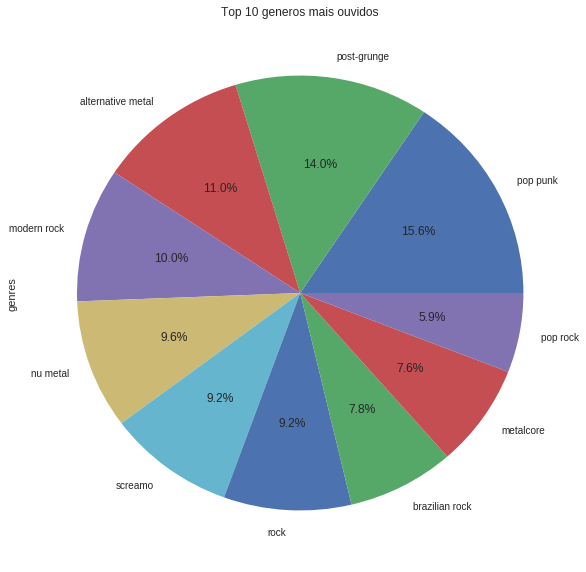

In [ ]:
qtd_generos = pdgenres.genres.value_counts(ascending=False).head(10)
print(qtd_generos)
qtd_generos.plot(kind='pie', figsize=(10,10),autopct='%1.1f%%')
plt.title('Top 10 generos mais ouvidos')
plt.show()

Our Last Night         47
Maroon 5               35
Muse                   34
Boyce Avenue           34
Avenged Sevenfold      34
Supercombo             32
Eminem                 32
All Time Low           31
Imagine Dragons        30
Jimmy Eat World        29
Fall Out Boy           28
Twenty One Pilots      27
Panic! At The Disco    27
Asking Alexandria      27
Weezer                 26
Name: artist, dtype: int64


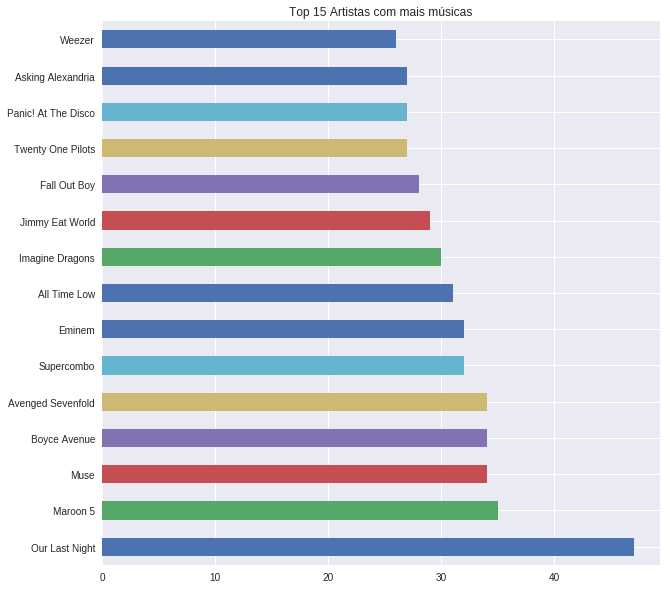

In [ ]:
top_artists = pdmusics.artist.value_counts().head(15)
print(top_artists)
top_artists.plot(kind='barh', figsize=(10,10))
plt.title('Top 15 Artistas com mais músicas')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


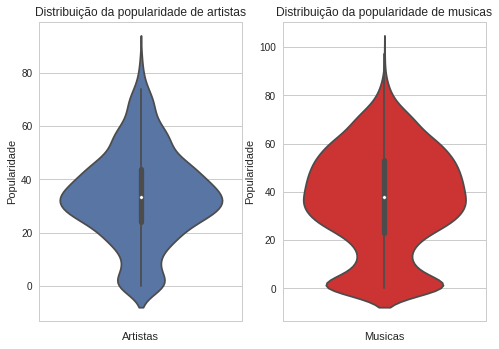

In [ ]:
pop_artists = pdmusics.groupby('artist').popularity.mean().sort_values(ascending=False)
pop_artists.head(15)

sns.set(style="whitegrid")

plt.subplot(1,2,1)
sns.violinplot(y=pop_artists)
plt.title('Distribuição da popularidade de artistas')
plt.xlabel('Artistas')
plt.ylabel('Popularidade')

plt.subplot(1,2,2)
sns.violinplot(y='popularity', data=pdmusics, color='red', saturation=0.6)
plt.title('Distribuição da popularidade de musicas')
plt.xlabel('Musicas')
plt.ylabel('Popularidade')

plt.show()

In [ ]:
mlist = isp.get_user_playlists(spfy, '12144777067', features=True)
namelist = isp.get_user_playlists(spfy, '12144777067')

retrying ...1secs
retrying ...1secs


In [ ]:
musics = []
for playlist, tracks in namelist:
    for track in tracks:
        musics.append(track)
        
result = pd.DataFrame(mlist)
namedata = pd.DataFrame(musics)

alldata = pd.merge(result, namedata, how='left', on='id').drop_duplicates(subset='id')
alldata.info(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5936 entries, 0 to 12887
Data columns (total 15 columns):
acousticness        5936 non-null float64
danceability        5936 non-null float64
energy              5936 non-null float64
id                  5936 non-null object
instrumentalness    5936 non-null float64
key                 5936 non-null int64
liveness            5936 non-null float64
loudness            5936 non-null float64
mode                5936 non-null int64
speechiness         5936 non-null float64
tempo               5936 non-null float64
valence             5936 non-null float64
duration_ms         5936 non-null int64
name                5936 non-null object
popularity          5936 non-null int64
dtypes: float64(9), int64(4), object(2)
memory usage: 742.0+ KB


In [ ]:
alldata.to_csv('gabriel_playlists.csv')
files.download('gabriel_playlists.csv')

In [ ]:
alldata = alldata.sample(frac=1)
alldata = alldata[:500]
alldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 12345 to 1004
Data columns (total 15 columns):
acousticness        500 non-null float64
danceability        500 non-null float64
energy              500 non-null float64
id                  500 non-null object
instrumentalness    500 non-null float64
key                 500 non-null int64
liveness            500 non-null float64
loudness            500 non-null float64
mode                500 non-null int64
speechiness         500 non-null float64
tempo               500 non-null float64
valence             500 non-null float64
duration_ms         500 non-null int64
name                500 non-null object
popularity          500 non-null int64
dtypes: float64(9), int64(4), object(2)
memory usage: 62.5+ KB


Text(0.5,1,'Correlações entre colunas')

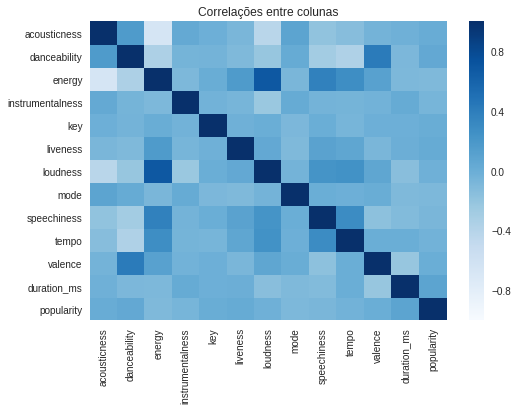

In [ ]:
sns.heatmap(alldata.corr(), cmap='Blues')
plt.title('Correlações entre colunas')

In [ ]:
alt.Chart(alldata).mark_point().encode(
    x='danceability',
    y='valence',
    tooltip='name',
)

Chart({
  data:        acousticness  danceability  energy                      id  \
  12345      0.183000         0.475   0.432  028mxAauDksobrL61eJaBW   
  12724      0.000259         0.399   0.957  0klrTVsumlVPimBGpwNtEo   
  11907      0.312000         0.452   0.889  6Yu1OL8I0D4vjOzYdsXYGK   
  4536       0.000555         0.501   0.887  4WbB8k3uV9RZ6SlZANJdUI   
  10692      0.000102         0.565   0.986  6mbimqh0qdpNUvnhBYlhB3   
  1444       0.003160         0.571   0.934  69vMDipMastHvYna7plBdS   
  5372       0.238000         0.500   0.770  36Pim2ANczp82lCWIb8GHy   
  12103      0.005750         0.502   0.966  44TuSOP6xIAEeJmZsN3nXO   
  4824       0.000954         0.538   0.960  3SPsl2JHbOzNs5velQHz8h   
  3233       0.072200         0.700   0.742  1cjiLJacTKtJbdCtMk1XeV   
  7034       0.007810         0.902   0.934  4d0vDZBKQFL4sVB47XbAnL   
  3839       0.000030         0.365   0.978  1CF426318xBsb8ZaGrP94H   
  892        0.047000         0.709   0.911  3Ebyt2DAYMaxCmdeYh7PwB   
  6306       0.017900         0.340   0.771  5MpPLjNyTO4AcTCqSkCj90   
  6430       0.435000         0.678   0.630  72dMZ0LC1KMa6YZTOYogxN   
  101        0.000248         0.541   0.968  3sHH7lklbfpcraDDvYnjo7   
  2894       0.000304         0.468   0.589  64BqzG127TS1nDPbiLzyhn   
  6728       0.000154         0.514   0.969  6U1Ea66MokhLy6kt7drO65   
  3474       0.001960         0.262   0.899  2JhEdjHXQRsmnQjelhcu7B   
  6705       0.457000         0.640   0.547  5h71xoauDInVk719DYvoPb   
  3650       0.025300         0.358   0.856  37CMjUAU8fL6YqZVTplZqZ   
  3815       0.001610         0.722   0.737  4qj2YNN0tiN0WxeVqmIRHC   
  2399       0.003240         0.584   0.771  2kwh3wHySHN1QCTAfMoxbm   
  7220       0.001050         0.269   0.839  0GZ8pk5BsSG2GmI06xj1y7   
  5054       0.000048         0.418   0.857  2lCeAKo6QUQYkdtid1sFIO   
  3252       0.001720         0.484   0.926  00vJnCNa4lRIRmAWwodCoT   
  6590       0.001950         0.441   0.978  6zCtX0m1Iwhq8YBCfmGw04   
  11532      0.017200         0.715   0.907  2WQ09wqQBIOor7Q0VpIDBK   
  5189       0.000740         0.423   0.992  5sFvDWDZmAzLKQkxJGoDQo   
  2276       0.000192         0.566   0.835  68pN2UQYhwQgPy7VrCFKuV   
  ...             ...           ...     ...                     ...   
  12882      0.720000         0.527   0.209  0ee40G4B8b2qjY0mWWc6ss   
  12543      0.000216         0.495   0.905  532FjiLrnEpBARLEteVwre   
  12325      0.002370         0.559   0.955  3gBiC50QtRYGuo9pL4fQfI   
  5893       0.291000         0.687   0.665  190ywYQfmKaT4p5fIXdT0x   
  8110       0.015600         0.504   0.987  4U4gPf8EEOh0nSG6P20R9s   
  12886      0.045500         0.470   0.740  6OocN63GLU7NF0wHdewhID   
  3384       0.002060         0.560   0.751  229XPYVkkwnmAsmVCVIeV3   
  4164       0.054200         0.412   0.477  69UqtTHfUKAJweQwEStRzC   
  3055       0.003390         0.333   0.877  0lHSJ0ZP8uUPnJXhMdGjOK   
  5628       0.263000         0.681   0.730  0ShisqdvyLS59YVgE8xGCC   
  2330       0.007250         0.465   0.896  3ZsexY07D4t4HRq7ogeSAS   
  4569       0.001690         0.525   0.977  3dk6BqSUG9LN29Pd1pHX7q   
  7409       0.646000         0.445   0.263  65Fz2cM2BiIlBBlNbw5RtZ   
  4554       0.000014         0.291   0.955  6vdQ2npv78yOkUgOeCPtuT   
  6650       0.000207         0.469   0.964  366ABIopJkMbrEVoDsb9TM   
  5518       0.000512         0.669   0.946  6In1MTxcgm3bi55NZsNI0O   
  1101       0.057700         0.618   0.676  6bZaumwiWjUSLSLqUyxetj   
  1253       0.008440         0.389   0.905  6YjciGk65aCrZAXjaQVG6C   
  2761       0.000073         0.335   0.994  75q03jCYlTBLGRaN2GpcdO   
  6122       0.000036         0.378   0.959  0DkmhHO4yyqCJFjosmmWPU   
  5688       0.799000         0.444   0.398  018Idkvf82hi44UZmIXiGB   
  1034       0.000048         0.258   0.978  0NTnFf9vA6Ct0i4qNVGjq6   
  1540       0.018800         0.743   0.752  1XGmzt0PVuFgQYYnV2It7A   
  12805      0.000023         0.544   0.991  6T538WFQ5EXM16Kj79NBZv   
  11546   